# Exploring the proportion of land that is considered to be in a drought in Imperial & Riverside County
## Data was obtained from US Drought Monitoring System & WiFire Commons

First, I will import all the libraries I may need in the notebook

In [55]:
# import libraries
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import contextily as ctx

Next, I will upload the gjsn file that has the county boundaries. I also inspect the data set to determine which column name/variable I will use to merge the data with my csv file containing drought information. In this case, I am interested in extracting only the shapefile around Imperial & Riverside County, using the CountyName column.

In [56]:
counties_gdf = gpd.read_file('California_County_Boundaries.geojson')

In [57]:
counties_gdf.sample(10)

,OBJECTID,CountyName,AdminRegion,FireMAR,LawMAR,State_FIPS_ID,County_FIPS_ID,Shape__Area,Shape__Length,geometry
53,54,Tulare,Inland Region,V,V,06,107,1.930518e+10,648995.873854,"POLYGON ((-118.36864 36.75412, -118.37089 36.7..."
4,5,Calaveras,Inland Region,IV,IV,06,009,4.352160e+09,371781.055548,"POLYGON ((-120.20981 38.50033, -120.21049 38.4..."
18,19,Los Angeles,Southern Region,I,I,06,037,1.556206e+10,949056.873805,"MULTIPOLYGON (((-117.66648 34.82269, -117.6744..."
56,57,Yolo,Inland Region,IV,IV,06,113,4.349584e+09,418928.090468,"POLYGON ((-122.33885 38.92438, -122.34685 38.9..."
23,24,Merced,Inland Region,V,V,06,047,8.057256e+09,426882.428317,"POLYGON ((-120.38721 37.63405, -120.39467 37.6..."
48,49,Sonoma,Coastal Region,II,II,06,097,6.728804e+09,499739.981786,"POLYGON ((-123.53221 38.76875, -123.53229 38.7..."
33,34,Sacramento,Inland Region,IV,IV,06,067,4.149831e+09,409262.771554,"POLYGON ((-121.60212 38.73646, -121.60216 38.7..."
25,26,Mono,Southern Region,VI,VI,06,051,1.306683e+10,698782.615951,"POLYGON ((-119.58568 38.56093, -119.58589 38.5..."
0,1,Alameda,Coastal Region,II,II,06,001,3.082165e+09,432059.180712,"MULTIPOLYGON (((-122.26853 37.90446, -122.2687..."
46,47,Siskiyou,Inland Region,III,III,06,093,2.943644e+10,899086.423990,"POLYGON ((-123.51684 42.00163, -123.51787 41.9..."


After inspecting my csv file, I realized the column names did not match the gjsn file. I renamed the column, CountyName, and removed the word "county" in the values Riverside and Imperial.  

In [58]:
countydf=pd.read_csv('RiversideImperialDrought.csv')

In [59]:
countydf.sample(10)

,MapDate,FIPS,CountyName,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
85,20220628,6065,Riverside,CA,0,0.00,0.00,54.73,45.27,0,6/28/2022,7/4/2022,2
99,20220322,6065,Riverside,CA,0,0.00,42.80,56.95,0.24,0,3/22/2022,3/28/2022,2
45,20220329,6025,Imperial,CA,0,0.00,7.82,92.18,0.00,0,3/29/2022,4/4/2022,2
43,20220412,6025,Imperial,CA,0,0.00,0.00,100.00,0.00,0,4/12/2022,4/18/2022,2
23,20220830,6025,Imperial,CA,0,0.00,0.00,100.00,0.00,0,8/30/2022,9/5/2022,2
50,20220222,6025,Imperial,CA,0,0.00,100.00,0.00,0.00,0,2/22/2022,2/28/2022,2
66,20221108,6065,Riverside,CA,0,0.00,43.42,56.58,0.00,0,11/8/2022,11/14/2022,2
0,20230207,6025,Imperial,CA,0,47.65,52.35,0.00,0.00,0,2/7/2023,2/13/2023,2
103,20220222,6065,Riverside,CA,0,0.00,77.41,22.59,0.00,0,2/22/2022,2/28/2022,2
41,20220426,6025,Imperial,CA,0,0.00,0.00,100.00,0.00,0,4/26/2022,5/2/2022,2


Now that both the column names, and values match, I can merge the files.

In [60]:
newdf= counties_gdf.merge(countydf, on="CountyName")

In [61]:
newdf.columns

Index(['OBJECTID', 'CountyName', 'AdminRegion', 'FireMAR', 'LawMAR',
       'State_FIPS_ID', 'County_FIPS_ID', 'Shape__Area', 'Shape__Length',
       'geometry', 'MapDate', 'FIPS', 'State', 'None', 'D0', 'D1', 'D2', 'D3',
       'D4', 'ValidStart', 'ValidEnd', 'StatisticFormatID'],
      dtype='object')

In [62]:
# renaming columns 
newdf = newdf.rename(columns={'D0': 'Abnormaly Dry', 'D1': 'Moderate Drought', 'D2': 'Severe Drought', 'D3': 'Extreme Drought', 'D4': 'Exceptional Drought'})

In [63]:
newdf.columns

Index(['OBJECTID', 'CountyName', 'AdminRegion', 'FireMAR', 'LawMAR',
       'State_FIPS_ID', 'County_FIPS_ID', 'Shape__Area', 'Shape__Length',
       'geometry', 'MapDate', 'FIPS', 'State', 'None', 'Abnormaly Dry',
       'Moderate Drought', 'Severe Drought', 'Extreme Drought',
       'Exceptional Drought', 'ValidStart', 'ValidEnd', 'StatisticFormatID'],
      dtype='object')

I use the basic plot function to verify that I clipped the geojsn file properly. 

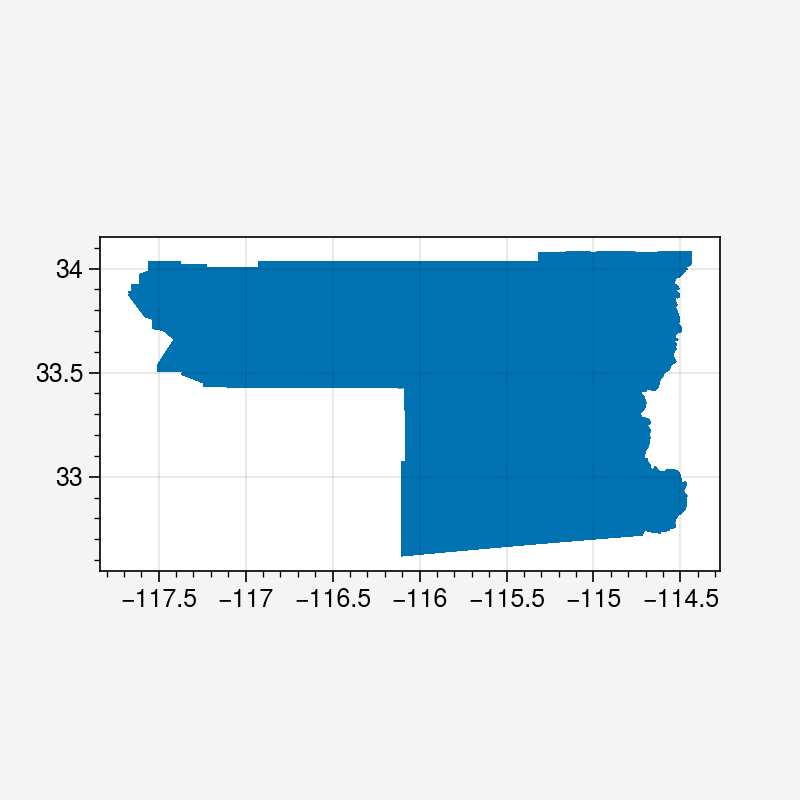

In [64]:
newdf.plot()

Next, I project my file to the mercator system so that I can add a basemap later on.

In [68]:
newdf_mercator = newdf.to_crs(3857)


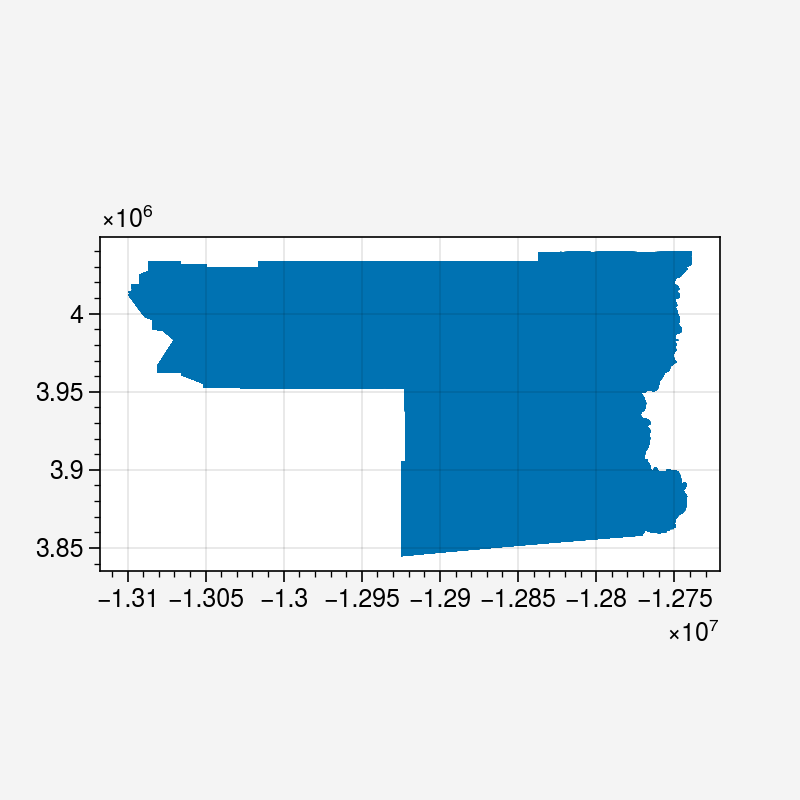

In [66]:
newdf_mercator.plot()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

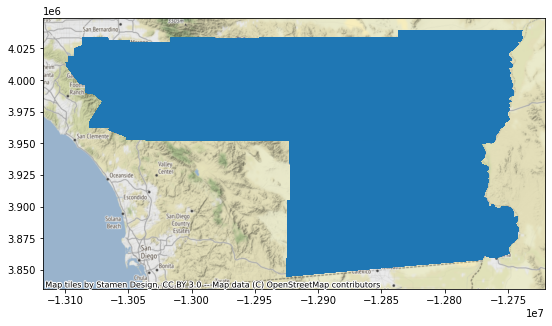

In [28]:
# to install library : sudo apt-get install python-matplotlib
from mpl_toolkits.basemap import Basemap
# 1. Draw the map background
# 2. scatter city data, with color reflecting population
# and size reflecting area
ax = newdf_mercator.to_crs('EPSG:3857').plot(figsize=(9, 9))

ctx.add_basemap(ax)

# 3. create colorbar and legend
plt.colorbar(label='temperature anomaly (°C)')
plt.clim(3, 7);

KeyError: "None of [Index(['A', 'B', 'C'], dtype='object')] are in the [columns]"

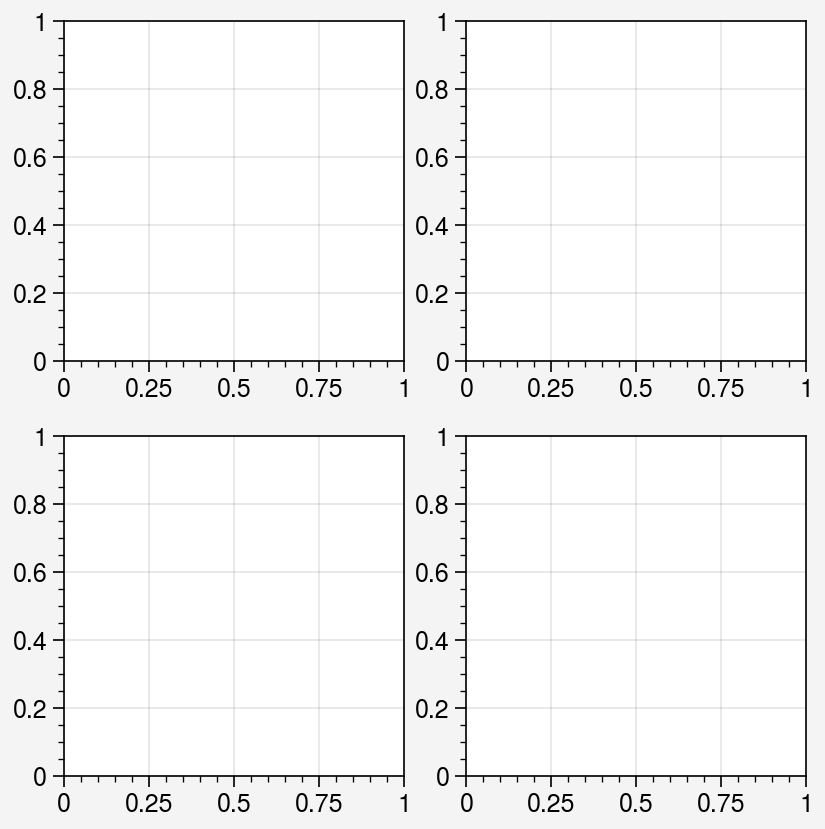

In [92]:
import proplot as pplt
import numpy as np
state = np.random.RandomState(51423)
fig, axs = pplt.subplots(
    ncols=2, nrows=2, order='F', refwidth=1.7, wspace=2.5, share=False
)

# Plot data
s_array = df[["A", "B", "C"]].to_numpy()

for ax in axs[:2]:
    m = ax.contourf(data, cmap='grays', extend='both')
hs = []

# Add colorbars and legends
fig.colorbar(m, length=0.8, label='colorbar label', loc='b', col=1, locator=5)
fig.colorbar(m, label='colorbar label', loc='l')
fig.format(abc='A', abcloc='ul', suptitle='Figure colorbars and legends demo')
for ax, title in zip(axs, ('2D {} #1', '2D {} #2', 'Line {} #1', 'Line {} #2')):
    ax.format(xlabel='xlabel', title=title.format('dataset'))

In [106]:
newdf['Moderate Drought'].to_numpy()

array([5.235e+01, 5.235e+01, 5.235e+01, 5.235e+01, 5.235e+01, 5.235e+01,
       5.235e+01, 5.235e+01, 5.235e+01, 1.000e+02, 1.000e+02, 1.000e+02,
       1.000e+02, 1.000e+02, 1.000e+02, 1.000e+02, 1.000e+02, 8.323e+01,
       8.282e+01, 8.310e+01, 8.278e+01, 8.278e+01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 7.790e+00, 7.820e+00, 7.820e+00, 7.820e+00,
       7.820e+00, 7.820e+00, 1.000e+02, 1.000e+02, 1.000e+02, 8.479e+01,
       8.491e+01, 8.491e+01, 8.491e+01, 8.491e+01, 8.483e+01, 8.483e+01,
       8.483e+01, 8.483e+01, 7.140e+01, 7.140e+01, 7.140e+01, 7.140e+01,
       4.342e+01, 4.342e+01, 4.342e+01, 4.342e+01, 1.096e+01, 1.086e+01,
       1.067e+01, 1.003e+01, 1.003e+01, 4.000e-02, 4.000e-02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

# Adding BaseMap & Analyzing different levels of Drought in Imperial County

Here, I create two graphs displaying different levels of drought. Where D1 is Moderate Drought and D2 is Severe Drought. The Bar on the right hand side is the proportion of land in each county that is classified to be experience either Moderate or Severe Drought. I do not include maps for D0, D3, or D4, as none of the area is currently experiencing that level of drought. 


AttributeError: 'PatchCollection' object has no property 'title'

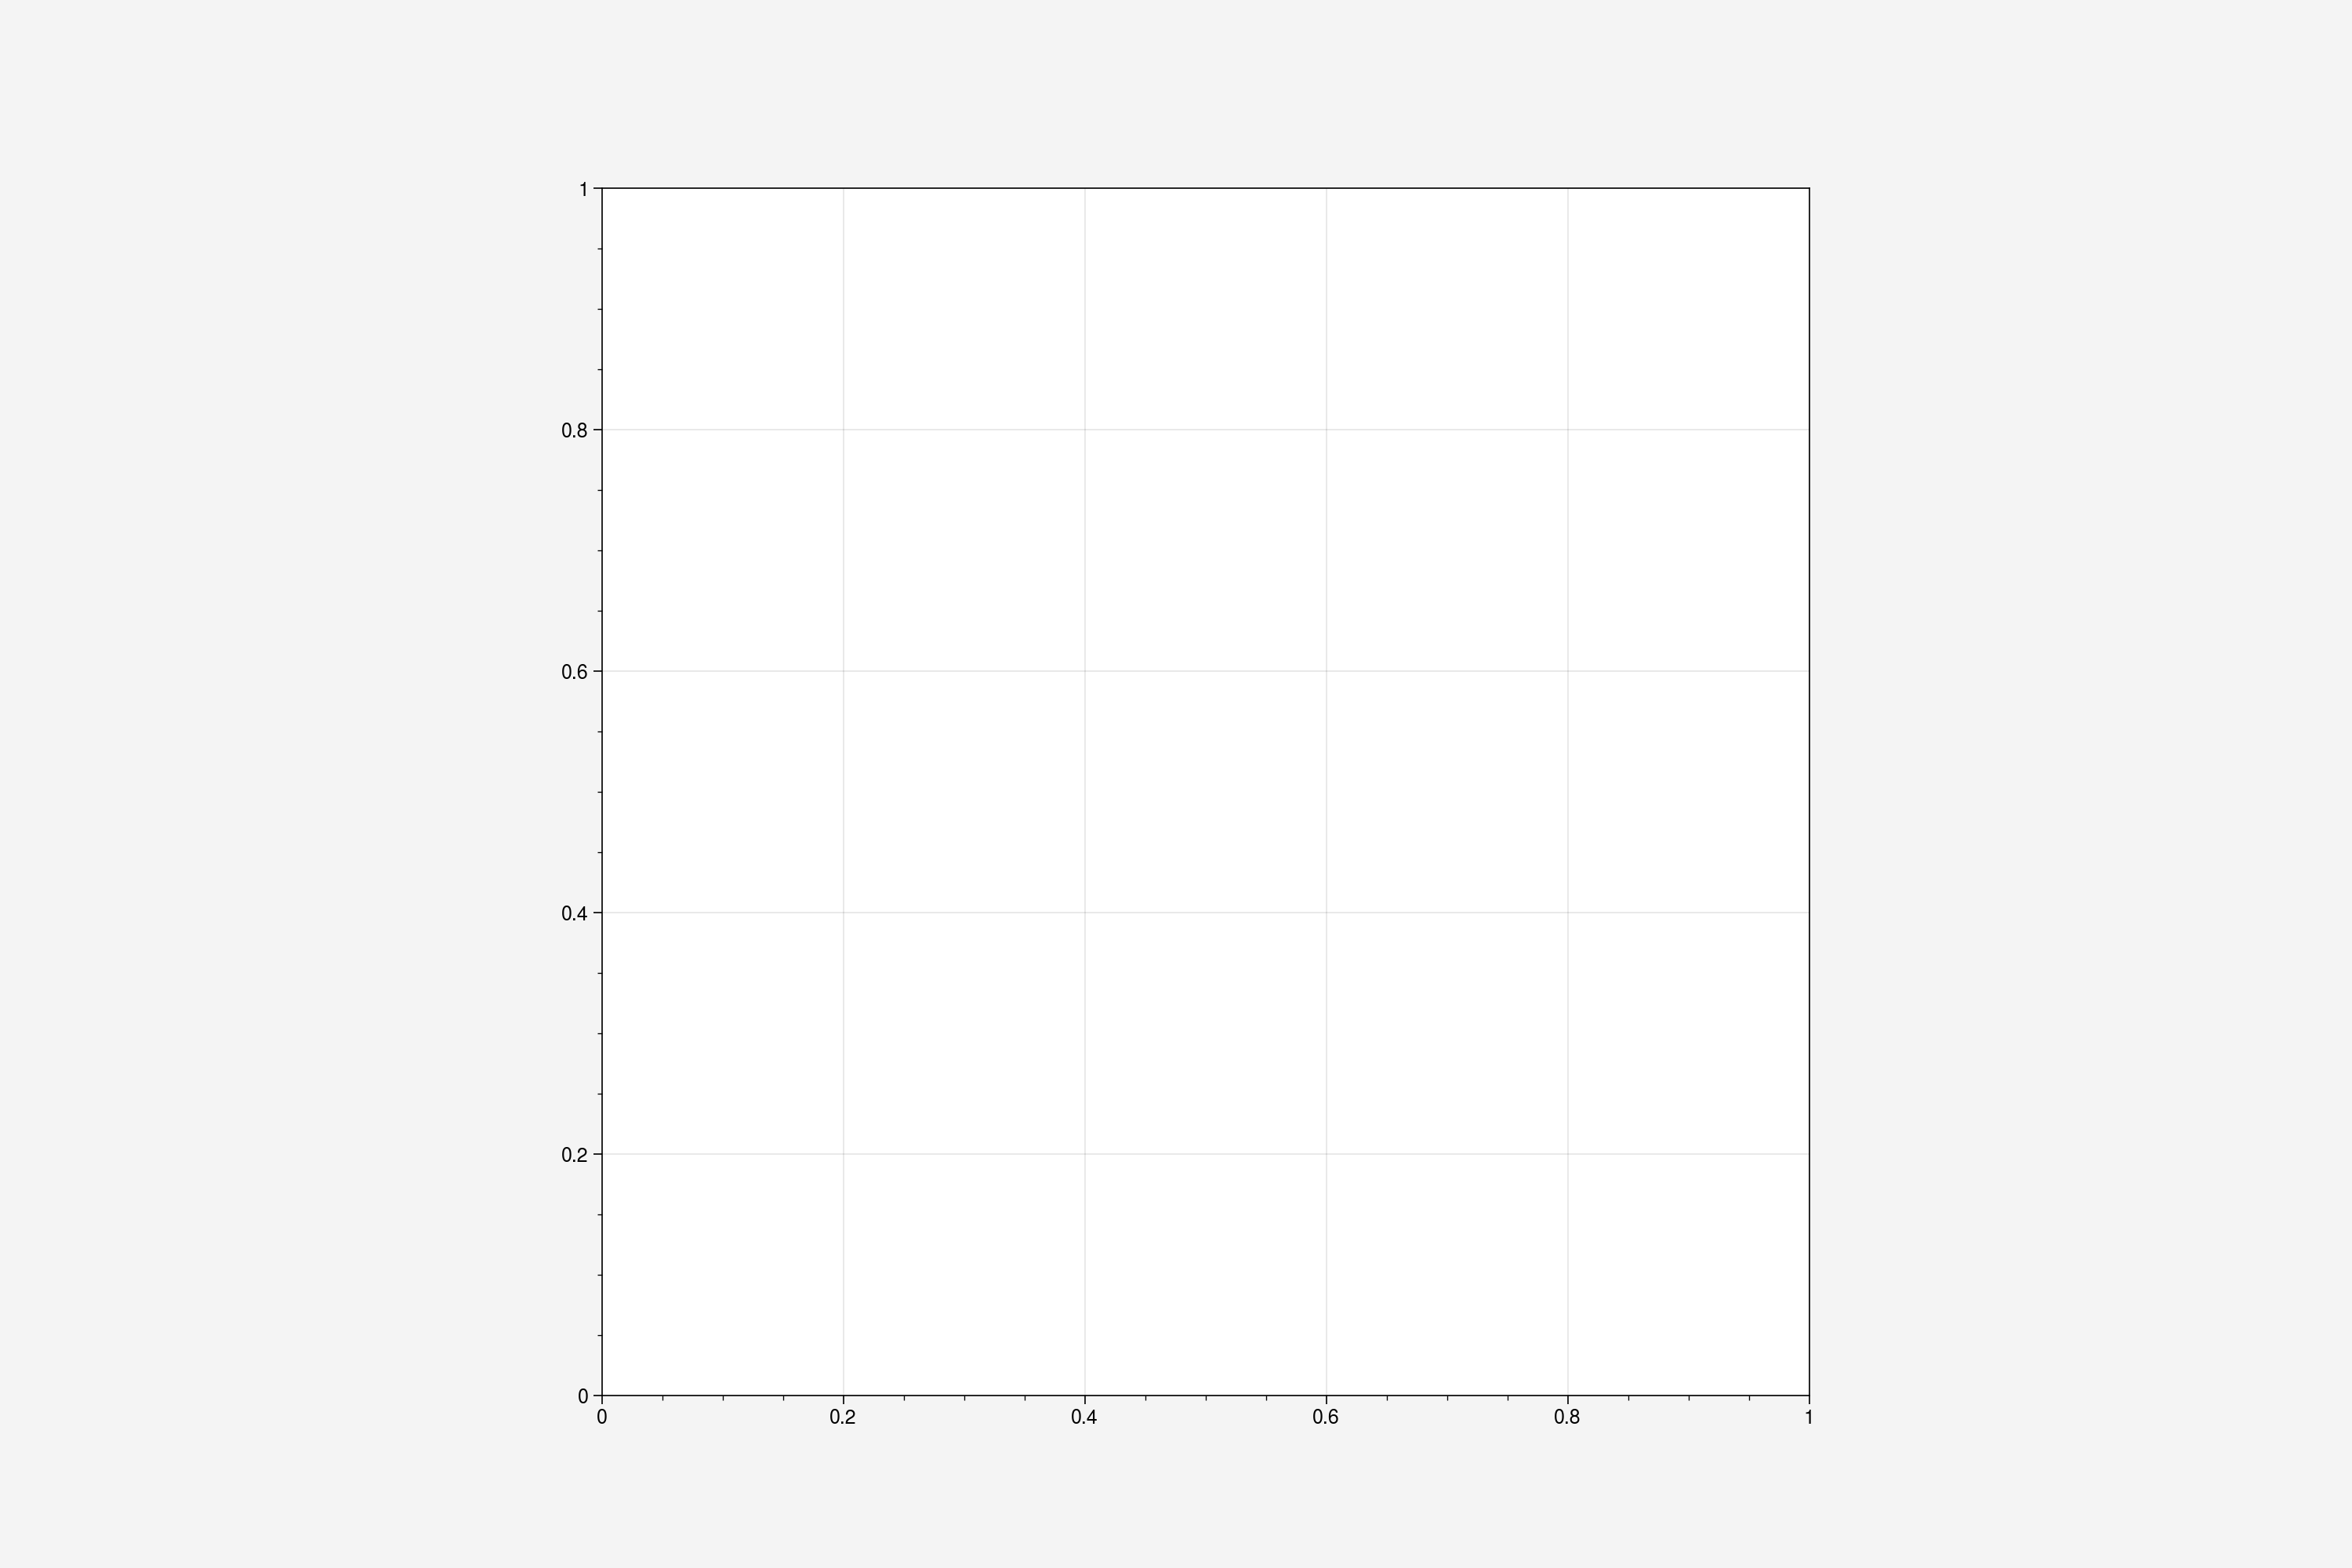

In [158]:


# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(.75), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]
for col in ['Moderate Drought','Severe Drought']:
    fig, ax = plt.subplots(figsize=(15,10))
    cbar = newdf_mercator.plot(ax=ax,
        markersize=200,
        edgecolor='white',
        alpha=0.8,
        column=col,
        cmap='CMRmap_r',
        legend=True,legend_kwds={'label': 'The proportion of the county experiencing drought', "orientation": "vertical"})
    ax.legend(custom_lines, ['Moderate Drought','Exceptional Drought','Abnormaly Dry','Severe Drought'
                             ,'Extreme Drought'],loc=0)
    # add osm basemap
    ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')

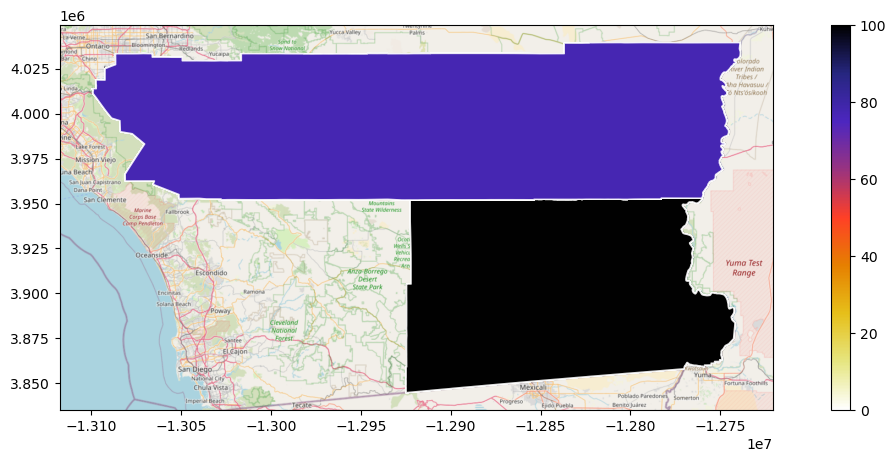

In [61]:
# create plot
fig, ax = plt.subplots(figsize=(15,5))

# plot earthquakes
#column= color -- when you give matplot lib a numeric column, it automatically creates a gradient 
#alpha= opacity
newdf_mercator.plot(ax=ax,
    markersize=200,
    edgecolor='white',
    alpha=0.8,
    column='D1',
    cmap='CMRmap_r',
    legend=True)

# add osm basemap
ctx.add_basemap(ax=ax, source='http://tile.openstreetmap.org/{z}/{x}/{y}.png')